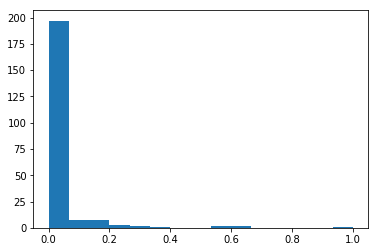

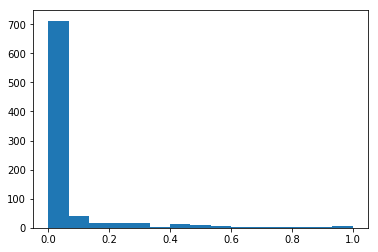

(array([2.7759e+04, 1.2800e+02, 5.9000e+01, 4.8000e+01, 3.3000e+01,
        2.4000e+01, 2.9000e+01, 2.1000e+01, 1.1000e+01, 1.4000e+01,
        1.8000e+01, 9.0000e+00, 7.0000e+00, 1.3000e+01, 1.3000e+01]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

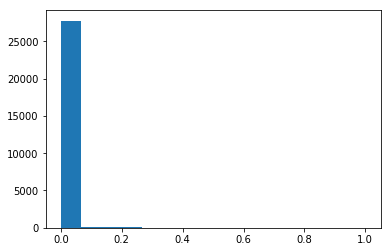

In [128]:
import matplotlib
%matplotlib inline
import scipy
from scipy import stats
import numpy as np
from numpy import vstack
from numpy import concatenate
from matplotlib import pyplot as plt

def sample_exp(n, k): #k is the parameter for the exponential distribution
    q=np.random.rand(n) #sample n points from a uniform distribution
    result=stats.expon.ppf(q,loc=0,scale=1/k)  #take the inverse probability transform to get samples from an exponential distribution
    return result

def gibbs(B,T):
    start_y = np.random.rand(1)*B
    start_x = sample_exp(n = 1, k = start_y[0])
    start = concatenate((start_x, start_y), axis = None)
    result = np.matrix(start)
    current_x = start_x[0]
    current_y = start_y[0]
    for i in range(T):
        current_y = sample_exp(n = 1, k = current_x)
        current_x = sample_exp(n = 1, k = current_y)
        current = concatenate((current_x, current_y), axis = None)
        result = vstack((result, current))
    return result

sample1 = gibbs(B = 5, T = 500)
est1_x = np.mean(np.asarray(sample1[:,0]))
plt.hist(np.asarray(sample1[:,0]), 15, range = (0,1))
plt.show()

sample2 = gibbs(B = 5, T = 5000)
est2_x = np.mean(np.asarray(sample2[:,0]))
plt.hist(np.asarray(sample2[:,0]), 15, range = (0,1))
plt.show()

sample3 = gibbs(B = 5, T = 50000)
est3_x = np.mean(np.asarray(sample3[:,0]))
plt.hist(np.asarray(sample3[:,0]), 15, range = (0,1))

